# Mixmod conversion example

This notebook shows how to convert to a mixmod ensemble. To drive the point home, we'll start with an initial mixmod ensemble based on 3 normal distributions. However to make it easier to see what's going on, we'll focus on the first normal distribution centered at 0.5

<Axes: xlabel='redshift', ylabel='p(z)'>

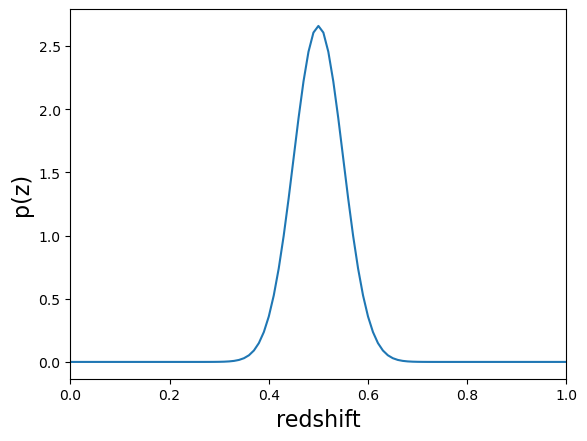

In [1]:
import numpy as np
import qp

import matplotlib.pyplot as plt

mu = np.array([[0.5,1.1, 2.9], [0.5, 1.25, 2.8], [0.3, 1.9, 2.2]])
sig = np.array([[0.05,0.01,0.04], [0.05,0.01,0.02], [0.025, 0.01, 0.025]])
wt = np.array([[1,1,1], [1,1,1], [1,1,1]])

ens = qp.Ensemble(qp.mixmod, data=dict(means=mu, stds=sig, weights=wt))
ens[1].plot_native(xlim=(0,1))

In the following example we use the default parameters to convert the input mixmod ensemble into another mixmod ensemble. We do the conversion 10 times and plot each on top of the original distribution. 

Note that the peaks of the converted distributions are not consistent.

ValueError: Oops, we can't handle this kind of input to mixmod._ppf 2

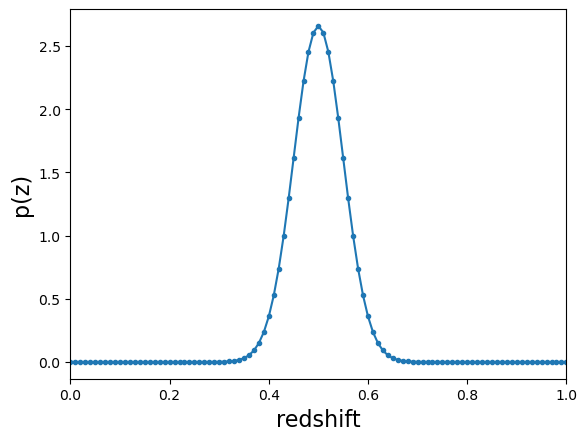

In [4]:
xvals = np.linspace(0, 1., 301)

axes_m = ens.plot_native(xlim=(0,1.), label='Original', marker='.')

for i in range(10):
    ens_m = qp.convert(ens[0], 'mixmod', xvals=xvals, ncomps=3)
    _ = ens_m.plot(axes=axes_m, label=f'iteration_{i}', color=np.random.rand(3,))

leg_m = axes_m.legend()

Reproducing the above plots, but this time specifying the number of random variates to be drawn from the input distribution to be 100_000 instead of the default 1000. Note that the peaks are now more consistent across the 10 iterations, but still show some jitter.

ValueError: Opps, we handle this kind of input to mixmod._ppf 2

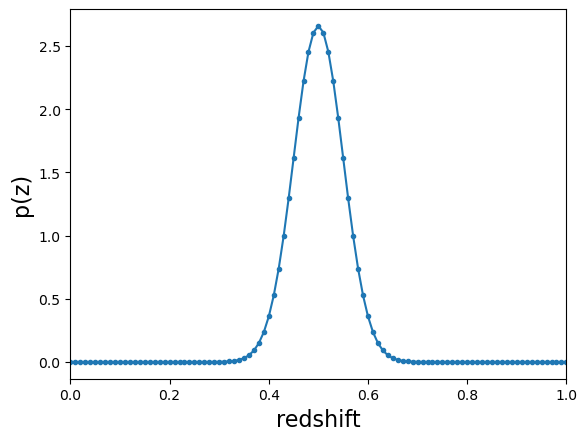

In [3]:
xvals = np.linspace(0, 1., 301)

axes_m = ens.plot_native(xlim=(0,1.), label='Original', marker='.')

for i in range(10):
    ens_m = qp.convert(ens, 'mixmod', xvals=xvals, ncomps=3, nsamples=100_000)
    _ = ens_m.plot(axes=axes_m, label=f'iteration_{i}', color=np.random.rand(3,))

leg_m = axes_m.legend()

Here we use the default number of samples (1000), but specify the random_state value for drawing the random variates. This results in all iterations being identical, and reproducible. 

ValueError: Opps, we handle this kind of input to mixmod._ppf 2

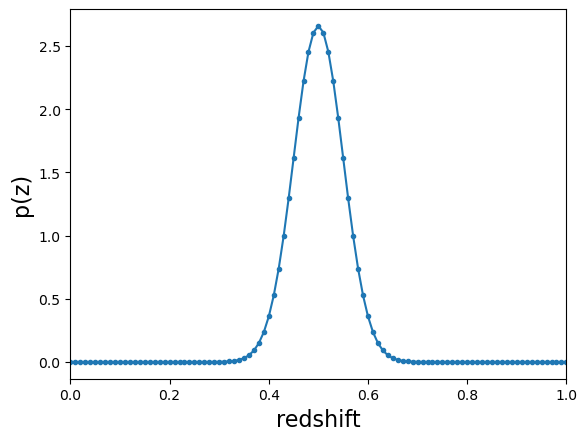

In [4]:
xvals = np.linspace(0, 1., 301)

axes_m = ens.plot_native(xlim=(0,1.), label='Original', marker='.')

for i in range(10):
    ens_m = qp.convert(ens, 'mixmod', xvals=xvals, ncomps=3, random_state=42)
    _ = ens_m.plot(axes=axes_m, label=f'iteration_{i}', color=np.random.rand(3,))

leg_m = axes_m.legend()

Finally, holding random_state constant, and increasing the number of samples results in the converted distributions consistently having the same values and showing a better reproduction of the input distribution.

ValueError: Opps, we handle this kind of input to mixmod._ppf 2

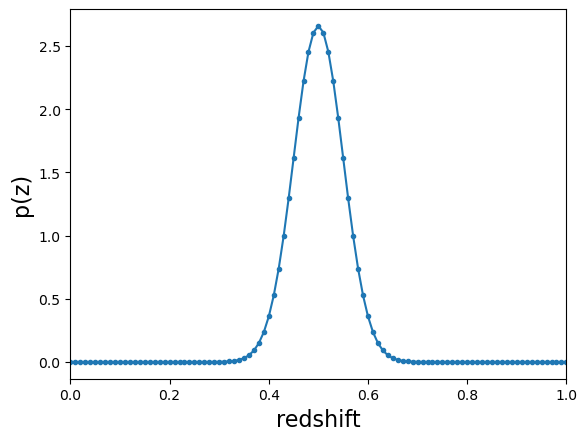

In [5]:
xvals = np.linspace(0, 1., 301)

axes_m = ens.plot_native(xlim=(0,1.), label='Original', marker='.')

for i in range(10):
    ens_m = qp.convert(ens, 'mixmod', xvals=xvals, ncomps=3, nsamples=100_000, random_state=42)
    _ = ens_m.plot(axes=axes_m, label=f'iteration_{i}', color=np.random.rand(3,))

leg_m = axes_m.legend()